In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

# ML Project

## Headers

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Dataset

In [3]:
train = pd.read_csv("C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ML/Project/Real Works/Dataset/fake-news/train.csv")

## Spliting Dataset

In [4]:
train = train.dropna()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [6]:
train.drop(train.index[6000:], inplace=True)

In [7]:
y_train = train['label']
X_train = train.drop(['id','author','label'],axis=1)



## Cleaning Dataset

In [8]:
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [9]:
print(y_train.info())
X_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 6000 entries, 0 to 6850
Series name: label
Non-Null Count  Dtype
--------------  -----
6000 non-null   int64
dtypes: int64(1)
memory usage: 93.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 6850
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6000 non-null   object
 1   text    6000 non-null   object
dtypes: object(2)
memory usage: 140.6+ KB


In [10]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cyril\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cyril\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cyril\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### removing HTML tags, special characters and punctuations, converting to lowercase, removing stop words, stemming the words and joining back every stemmed word back to a single string

In [11]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove special characters and punctuation
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Stem the tokens
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    # Join the tokens back into a single string
    text = ' '.join(stemmed_tokens)
    return text

In [12]:
X_train['title'] = X_train['title'].apply(clean_text)
X_train['text'] = X_train['text'].apply(clean_text)


### Vectorize the text data using TFIDF

In [13]:
#concatenating every features to a single input 

import numpy as np

X_train['final'] = X_train['title']+ X_train['text']

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=58825)
X_final = tfidf.fit_transform(X_train.final)


In [15]:
print(X_train)

                                                  title  \
0     hous dem aid didnt even see comey letter jason...   
1       flynn hillari clinton big woman campu breitbart   
2                                  truth might get fire   
3           15 civilian kill singl us airstrik identifi   
4     iranian woman jail fiction unpublish stori wom...   
...                                                 ...   
6846  target rais free ship purchas amount onlin sho...   
6847            tyranni peopl vacat photo new york time   
6848                        trump clear way oil pipelin   
6849                          reflect rio new york time   
6850  report san francisco consid crackdown uber lyf...   

                                                   text  \
0     hous dem aid didnt even see comey letter jason...   
1     ever get feel life circl roundabout rather hea...   
2     truth might get fire octob 29 2016 tension int...   
3     video 15 civilian kill singl us airstrik ident...

## Logistic Regression 

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression()
logreg.fit(X_final, y_train)

LogisticRegression()

## Multinomial Navie Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
mnb = MultinomialNB()
mnb.fit(X_final, y_train)

MultinomialNB()

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(X_final, y_train)

DecisionTreeClassifier()

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,criterion='entropy', random_state=50)

rf.fit(X_final, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=50)

## SVM

In [22]:
from sklearn import svm

sv = svm.SVC()
sv.fit(X_final, y_train)

SVC()

## AdaBoostClassifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
ABC = AdaBoostClassifier( n_estimators=50, random_state=50)
ABC.fit(X_final, y_train)

AdaBoostClassifier(random_state=50)

## GradientBoostingClassifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
GBC = GradientBoostingClassifier( n_estimators=50, random_state=50)
GBC.fit(X_final, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=50)

## Testing 

### Preprocessing Dataset for testing

In [27]:
import seaborn as sns

In [28]:
d1 = pd.read_csv("C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ML/Project/Real Works/Dataset/News-_dataset/True.csv")
d2 = pd.read_csv("C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ML/Project/Real Works/Dataset/News-_dataset/Fake.csv")

C:\Users\cyril\AppData\Local\Temp\ipykernel_24004\4259681247.py:2: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  d2 = pd.read_csv("C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ML/Project/Real Works/Dataset/News-_dataset/Fake.csv")


In [29]:
d1.drop(d1.index[3000:], inplace=True)
d2.drop(d2.index[3000:], inplace=True)

In [30]:
train = pd.concat([d1, d2], axis=0)

In [31]:
train = pd.concat([train['title'], train['text'],train['label']], axis=1)

In [32]:
train = train.dropna()

In [33]:
y_train = train['label']
X_train = pd.concat([train['title'], train['text']], axis=1)


In [34]:
X_train

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...,...
2995,Anonymous Just Took An Interest In Donald Tru...,Donald Trump once again attacked our intellige...
2996,Trump Finally Watched Alec Baldwin Mock His R...,"It took Donald Trump all day, but he apparentl..."
2997,Trump Demands Apology From The Media And Gets...,"Donald Trump, the pathetic man who has yet to ..."
2998,Atlanta Mayor And Newspaper DESTROY Trump For...,Donald Trump called Atlanta a crime infested ...


In [35]:
X_train['title'] = X_train['title'].apply(clean_text)
X_train['text'] = X_train['text'].apply(clean_text)

In [36]:
X_train = X_train['title']+ X_train['text']

In [37]:
# Vectorize the text data
tfidf = TfidfVectorizer(max_features=58825)
X_train = tfidf.fit_transform(X_train)

In [38]:
X_train

<6000x58825 sparse matrix of type '<class 'numpy.float64'>'
	with 958530 stored elements in Compressed Sparse Row format>

### Prediction

In [39]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

def matrix(mod,y_pred):
    # Compute classification metrics
    print("Accuracy :",accuracy_score(y_train, y_pred))

    cm = confusion_matrix(y_train, y_pred)
    # Plot the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, fmt='d')

    print ('Classification Report \n: ',classification_report(y_train, y_pred))

Accuracy : 0.4995
Classification Report 
:                precision    recall  f1-score   support

         0.0       0.33      0.00      0.00      3000
         1.0       0.50      1.00      0.67      3000

    accuracy                           0.50      6000
   macro avg       0.42      0.50      0.33      6000
weighted avg       0.42      0.50      0.33      6000



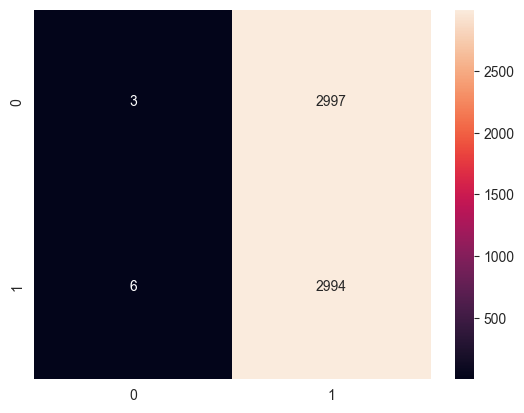

In [40]:
y_pred = logreg.predict(X_train)
matrix(logreg,y_pred)

Accuracy : 0.555
Classification Report 
:                precision    recall  f1-score   support

         0.0       0.76      0.16      0.27      3000
         1.0       0.53      0.95      0.68      3000

    accuracy                           0.56      6000
   macro avg       0.64      0.55      0.47      6000
weighted avg       0.64      0.56      0.47      6000



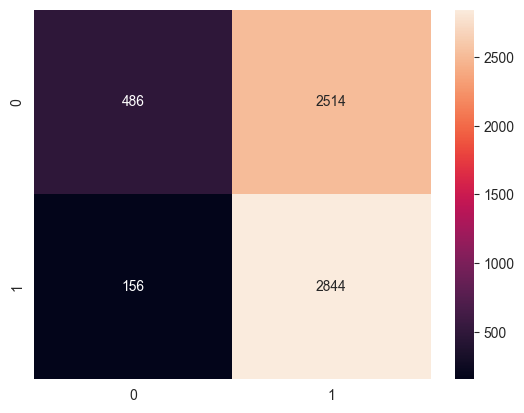

In [41]:
y_pred = mnb.predict(X_train)
matrix(mnb,y_pred)

Accuracy : 0.5026666666666667
Classification Report 
:                precision    recall  f1-score   support

         0.0       0.58      0.02      0.04      3000
         1.0       0.50      0.99      0.66      3000

    accuracy                           0.50      6000
   macro avg       0.54      0.50      0.35      6000
weighted avg       0.54      0.50      0.35      6000



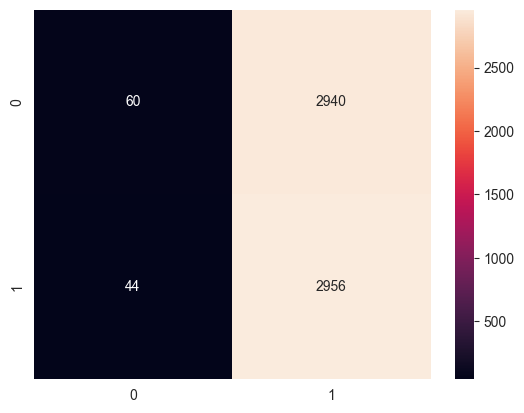

In [42]:
y_pred = DT.predict(X_train)
matrix(DT,y_pred)

Accuracy : 0.5
Classification Report 
:                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3000
         1.0       0.50      1.00      0.67      3000

    accuracy                           0.50      6000
   macro avg       0.25      0.50      0.33      6000
weighted avg       0.25      0.50      0.33      6000



C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

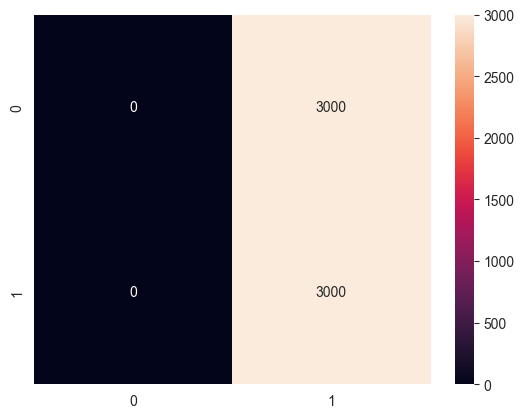

In [43]:
y_pred = rf.predict(X_train)
matrix(rf,y_pred)

Accuracy : 0.4995
Classification Report 
:                precision    recall  f1-score   support

         0.0       0.33      0.00      0.00      3000
         1.0       0.50      1.00      0.67      3000

    accuracy                           0.50      6000
   macro avg       0.42      0.50      0.33      6000
weighted avg       0.42      0.50      0.33      6000



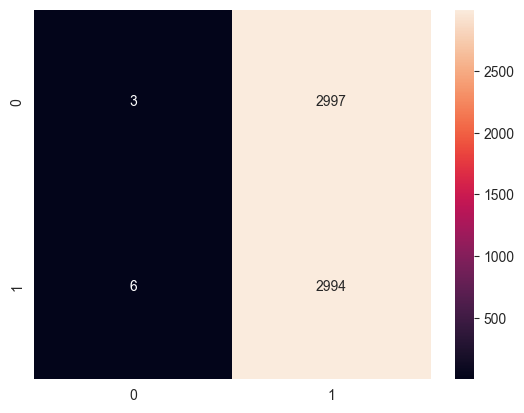

In [44]:
y_pred = sv.predict(X_train)
matrix(sv,y_pred)

Accuracy : 0.49833333333333335
Classification Report 
:                precision    recall  f1-score   support

         0.0       0.08      0.00      0.00      3000
         1.0       0.50      1.00      0.67      3000

    accuracy                           0.50      6000
   macro avg       0.29      0.50      0.33      6000
weighted avg       0.29      0.50      0.33      6000



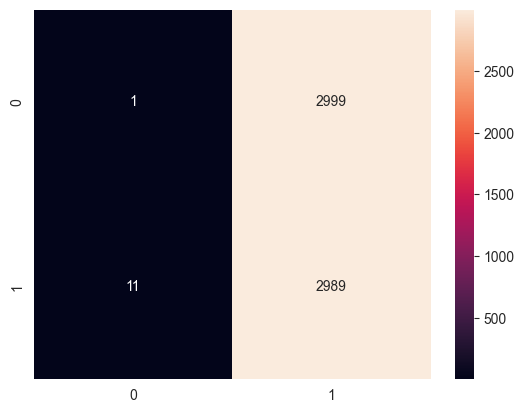

In [45]:
y_pred = ABC.predict(X_train)
matrix(ABC,y_pred)

Accuracy : 0.49983333333333335
Classification Report 
:                precision    recall  f1-score   support

         0.0       0.40      0.00      0.00      3000
         1.0       0.50      1.00      0.67      3000

    accuracy                           0.50      6000
   macro avg       0.45      0.50      0.33      6000
weighted avg       0.45      0.50      0.33      6000



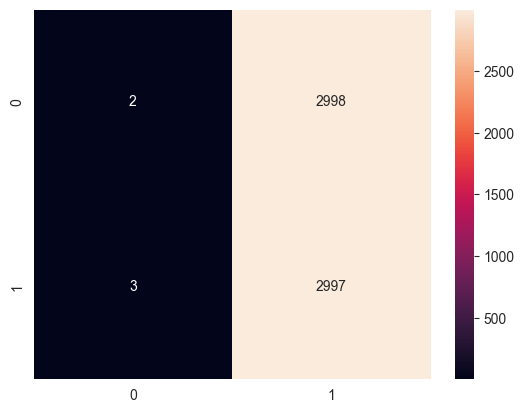

In [46]:
y_pred = GBC.predict(X_train)
matrix(GBC,y_pred)